In [26]:
# Import libraries
import numpy as np
import pandas as pd
import random
import seaborn
import matplotlib.pyplot as plt
import scipy
from scipy.fft import fft, ifft, fftfreq
seaborn.set_palette(seaborn.color_palette())
import warnings; warnings.simplefilter('ignore')

# Read dataset
FILE_NAME = 'aquatrax_usage_data_new.csv'
df = pd.read_csv(FILE_NAME)

# Extract data from specific MeterID
METERID = 54624
df_account = df.loc[df['MeterId']==METERID]

# Discrete Fourier Transform
# df_account['FFT_W'] = [i/len(df_account) for i in range(len(df_account))]
df_account['FFT_W'] = fftfreq(len(df_account), 1)
df_account['FFT_Period'] = 1/df_account['FFT_W']
df_account['FFT'] = fft(df_account['Value'])
df_account['FFTA'] = np.abs(df_account['FFT'])

# Cepstrum
df_account['Cepstrum'] = np.abs(ifft(np.log(np.absolute(fft(df_account['Value'])))))
df_account['Quefrency'] = np.array(range(len(df_account['Value'])))/1 #sample rate = 1 per hour


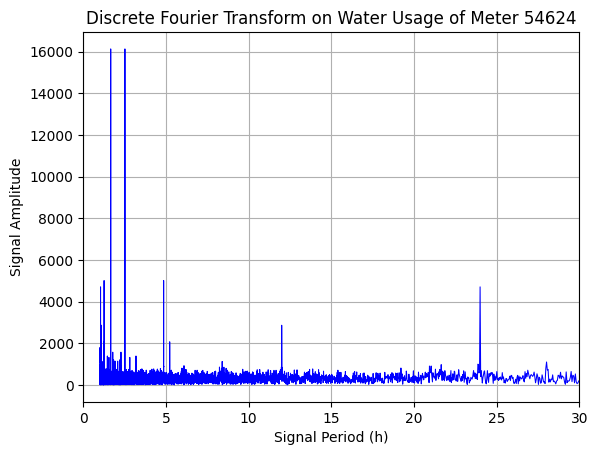

In [25]:
# Plot frequency domain result
plt.title(f'Discrete Fourier Transform on Water Usage of Meter {METERID}')
g = seaborn.lineplot(data=df_account,x="FFT_Period",y="FFTA",color='b',size=0.01)
g.set(xlim=(0, 30))#len(df_account['FFT_W'])))
g.set_xlabel(f'Signal Period (h)')
g.set_ylabel(f'Signal Amplitude')
legend = g.legend()
g.grid()
legend.remove()

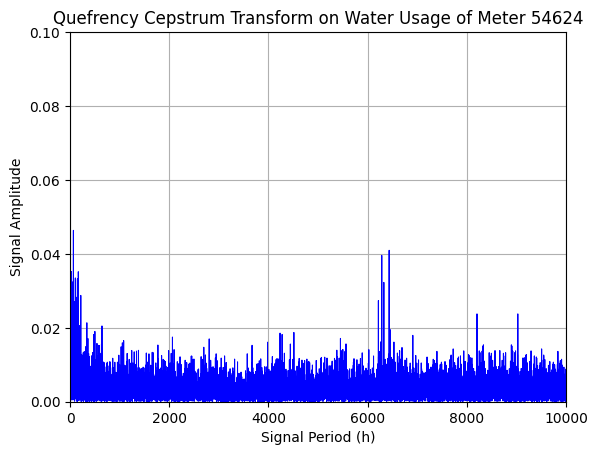

In [32]:
# Plot frequency domain result
plt.title(f'Quefrency Cepstrum Transform on Water Usage of Meter {METERID}')
g = seaborn.lineplot(data=df_account,x="Quefrency",y="Cepstrum",color='b',size=0.01)
g.set(xlim=(0, 10000))#len(df_account['FFT_W'])))
g.set(ylim=(0,0.1))
g.set_xlabel(f'Signal Period (h)')
g.set_ylabel(f'Signal Amplitude')
legend = g.legend()
g.grid()
legend.remove()

In [5]:
# Test for leak
daily_peak_row = df_account.loc[(df_account['FFT_Period'] > 23) & (df_account['FFT_Period'] < 25)].nlargest(1, ['FFTA'])
high_freq_peak_row = df_account.loc[(df_account['FFT_Period'] > 2) & (df_account['FFT_Period'] < 10)].nlargest(1, ['FFTA'])

# Compare peaks and find signal stronger than daily trend
if high_freq_peak_row['FFTA'].item() > daily_peak_row['FFTA'].item():
    print("Leak detected")
else:
    print("No leak detected")



Leak detected


In [6]:
fftfreq(len(df_account), 1)

array([ 0.00000000e+00,  5.80282017e-05,  1.16056403e-04, ...,
       -1.74084605e-04, -1.16056403e-04, -5.80282017e-05])

In [7]:
df_account['FFT_W']

171495    0.000000
171496    0.000058
171497    0.000116
171498    0.000174
171499    0.000232
            ...   
188723    0.999710
188724    0.999768
188725    0.999826
188726    0.999884
188727    0.999942
Name: FFT_W, Length: 17233, dtype: float64

In [8]:
len(fftfreq(len(df_account), 1)), len(df_account['FFT_W'])

(17233, 17233)